In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools as it

In [3]:
df = pd.DataFrame({'id_emp': [1,2,3,4,1], 
                   'name_emp': ['x','y','z','w','x'], 
                   'donnated_value':[1100,11000,500,300,1000],
                   'refound_value':[22000,22000,50000,450,90]
                })

In [4]:
df['return_percentagem'] = 100 * df['refound_value']/df['donnated_value']
df['classification_roi'] = ''

In [9]:
df

,id_emp,name_emp,donnated_value,refound_value,return_percentagem,classification_roi
0,1,x,1100,22000,2000.0,Good Investment
1,2,y,11000,22000,200.0,Good Investment
2,3,z,500,50000,10000.0,Good Investment
3,4,w,300,450,150.0,Good Investment
4,1,x,1000,90,9.0,Bad Investment


In [5]:
def comunidade(i):
        
        if i < 50:
            return 'Bad Investment'
        elif i >=50 and i < 100:
            return 'Median Investment'
        elif i >= 100:
            return 'Good Investment'

df['classification_roi'] = df['return_percentagem'].map(comunidade)


In [6]:
G = nx.Graph()
G.add_nodes_from([a for a in df.index])
for ie in set(df['id_emp']):
    indices = df[df['id_emp']==ie].index
    G.add_edges_from(it.product(indices,indices))

In [7]:
for c in set(df['classification_roi']):
    indices = df[df['classification_roi']==c].index
    G.add_edges_from(it.product(indices,indices))

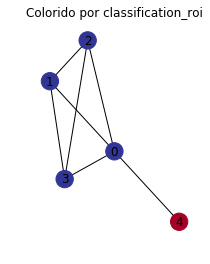

In [8]:
plt.subplot(121)
plt.title('Colorido por classification_roi')
color_mapping = {'Bad Investment':0,
                 'Median Investment': 1,
                 'Good Investment': 2}
nx.draw(G, node_color = df['classification_roi'].replace(color_mapping), cmap = 'RdYlBu', with_labels=True)

In [2]:
df = pd.DataFrame({'valor_doado_escala': [2.185669e-06,3.060221e-05,1.311530e-04,
2.213954e-05, 2.185669e-06]})

In [4]:
df = pd.DataFrame({'id_emp':[13524791000109, 12053850000137, 4707821000113],
                  'name_emp': ['JL Consultores', 'GRAAL OURINHOS','SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA'],
                  'name_dep': ['DIONILSO MATEUS MARCON', 'JOSE AUGUSTO ROSA', 'LUCIO ANTONIO MOSQUINI'],
                  'donnated_value': [ 750.00, 5000.00, 27350.00],
                  'donnated_amount': [1,1,1],
                  'reimbursed_value':[36000.00,410.55, 241.22],
                  'amount_reimbursed': [1,2,1],
                  'roi':[4800.00, 8.21,0.88]
                  })

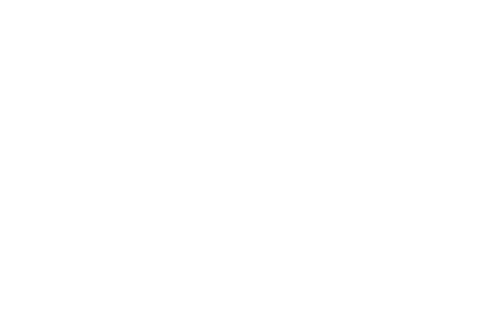

In [12]:
G = nx.Graph()
deputado = 'DIONILSO MATEUS MARCON'
lista_subset_graph = list(df[df["name_dep"] == deputado]["id_emp"]) + [deputado]
H = G.subgraph(lista_subset_graph)
nx.draw(H, style = "solid", with_labels = True)
plt.savefig("teste.png")  # save as png
plt.show()  # display

In [9]:
df

,id_emp,name_emp,name_dep,donnated_value,donnated_amount,reimbursed_value,amount_reimbursed,roi
0,13524791000109,JL Consultores,DIONILSO MATEUS MARCON,750.0,1,36000.00,1,4800.00
1,12053850000137,GRAAL OURINHOS,JOSE AUGUSTO ROSA,5000.0,1,410.55,2,8.21
2,4707821000113,SOJA COMERCIO DE DERIVADOS DE PETROLEO LTDA,LUCIO ANTONIO MOSQUINI,27350.0,1,241.22,1,0.88
